In [1]:
import sys
sys.path.extend(['../'])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from benchmarking.data_utils import load_data
from benchmarking.metrics import strategies_comparison, icc_matrix, qc_fc

In [14]:
from denoising.dataset import Dataset
from denoising.atlas import Atlas
from denoising.denoise_ica import DenoiseAROMA
from denoising.denoise import Denoising

In [4]:
pth = '/data/Projects/OpenCloseChina/derivatives_MNI152NLin6Asym/sub-1024011/func'
os.listdir(pth)

['sub-1024011_task-rest_run-2_from-boldref_to-T1w_mode-image_desc-coreg_xfm.json',
 'sub-1024011_task-rest_run-2_space-MNI152NLin6Asym_res-02_desc-preproc_bold.nii.gz',
 'sub-1024011_task-rest_run-2_desc-confounds_timeseries.json',
 'sub-1024011_task-rest_run-3_from-boldref_to-T1w_mode-image_desc-coreg_xfm.txt',
 'sub-1024011_task-rest_run-1_desc-confounds_timeseries.tsv',
 'sub-1024011_task-rest_run-1_desc-confounds_timeseries.json',
 'sub-1024011_task-rest_run-1_desc-coreg_boldref.json',
 'sub-1024011_task-rest_run-3_space-MNI152NLin6Asym_res-02_desc-preproc_bold.nii.gz',
 'sub-1024011_task-rest_run-1_space-MNI152NLin6Asym_res-02_boldref.json',
 'sub-1024011_task-rest_run-3_from-boldref_to-T1w_mode-image_desc-coreg_xfm.json',
 'sub-1024011_task-rest_run-2_space-MNI152NLin6Asym_res-02_desc-preproc_bold.json',
 'sub-1024011_task-rest_run-2_desc-hmc_boldref.nii.gz',
 'sub-1024011_task-rest_run-2_desc-hmc_boldref.json',
 'sub-1024011_task-rest_run-3_space-MNI152NLin6Asym_res-02_desc-prep

In [21]:
derivatives_path = '/arch/OpenCloseProject/derivatives/'
#derivatives_path = '/arch/OpenCloseBeijin/INDI_Lite_NIFTI/derivatives/'
#derivatives_path = '/data/Projects/OpenCloseChina/derivatives_MNI152NLin6Asym/aroma'

# enter number of runs
runs = 2
sessions = 1

# enter task name
task = 'rest'
tr = 2.5


data = Dataset(derivatives_path=derivatives_path, 
               sessions=sessions,
               TR=tr,
               runs=runs,
               task=task,
               ica_aroma=True)

In [22]:
atlas_name = 'Schaefer200'
mean_mask = None
#'/home/tm/projects/OpenCloseProject/notebooks/mean_mask_rmet_03.nii.gz'
#'/home/tm/projects/OpenCloseProject/notebooks/mean_mask_china_03.nii.gz'
atlas = Atlas(atlas_name=atlas_name)

In [6]:
den = DenoiseAROMA(
    aroma_deriv_dir="/data/Projects/OpenCloseIHB/derivatives_MNI152NLin6Asym/aroma",
    fmriprep_deriv_dir="/data/Projects/OpenCloseIHB/derivatives_MNI152NLin6Asym",
    atlas_labels_img=atlas.atlas_path, 
    aroma_desc="nonaggrDenoised",
    space="MNI152NLin6Asym",
    compcor_kind="a",
    n_compcor=5,
)


[fetch_atlas_schaefer_2018] Dataset found in ../atlas/schaefer_2018


In [ ]:
ts = den.denoise_many(subjects=None, 
                      task="rest", 
                      save_outputs=True, 
                      folder="/home/tm/projects/BenchmarkingEOEC/notebooks/test")

In [23]:
ts[0][0]

array([[-1.00090959,  0.2782898 , -0.2897304 , ...,  1.15001237,
         1.20633812,  0.70062954],
       [-1.74523598,  3.05197067,  2.12233165, ...,  0.97577707,
         7.69252316, 10.23551662],
       [-0.45422398,  0.24446192,  1.40957499, ...,  0.83014569,
         8.69100376, 10.17539148],
       ...,
       [-1.28223269,  2.5054956 ,  0.46283729, ..., -5.60286725,
        -2.19188717, -1.37891905],
       [ 2.38605511,  1.80848128, -1.19131031, ..., -0.6143066 ,
         0.51213637, -0.36867378],
       [ 1.32703826, -1.43525663,  0.60958253, ...,  9.81259284,
         7.61631644,  9.85798884]])

In [25]:
denoise = Denoising(data, atlas, 
                    # enter denoising options here
                    strategy=4, 
                    use_GSR=False, 
                    use_cosine=True, 
                    smoothing=None) 


ts_4str = denoise.fetch_timeseries(run=1, sub=["001"])

[fetch_atlas_schaefer_2018] Dataset found in ../atlas/schaefer_2018


In [33]:
ts_4str[0].shape

(120, 200)

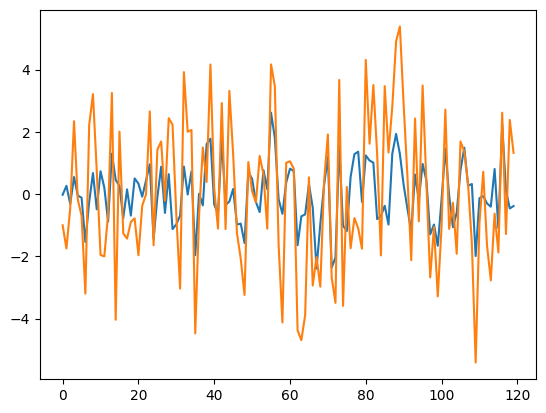

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(ts_4str[0][:, 0])
plt.plot(ts[0][0][:, 0])
plt.show()

In [38]:
comp = [np.corrcoef(ts_4str[0][:, i], ts[0][0][:, i])[0, 1] for i in range(200)]

In [40]:
np.mean(comp)

0.6954772696485082

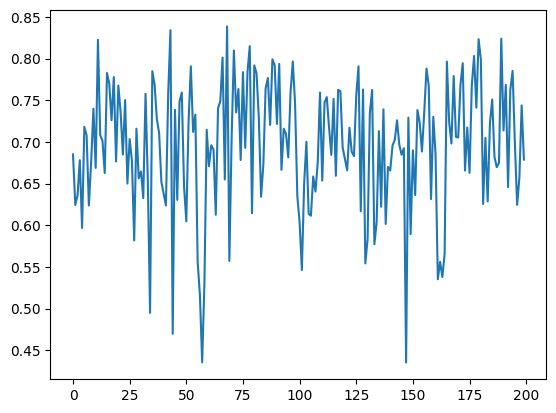

In [39]:
plt.plot(comp)